In [1]:
import xenaPython as xena
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mygene

C:\Users\lmcc9\Miniconda3\envs\py38\lib\site-packages\xenaPython\__init__.py:110: FutureWarning: Possible nested set at position 7
  re.sub(r"^[^[]+[[]([^]]*)[]].*$", r"\1", query, flags=re.DOTALL))


In [89]:
#finding common probes
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-ESCA.GDC_phenotype.tsv"
COADprobes = xena.xenaAPI.dataset_fields (hub, dataset)
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-SARC.GDC_phenotype.tsv"
TGCTprobes = xena.xenaAPI.dataset_fields (hub, dataset)
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-PAAD.GDC_phenotype.tsv"
OVprobes = xena.xenaAPI.dataset_fields (hub, dataset)
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-GBM.GDC_phenotype.tsv"
GBMprobes = xena.xenaAPI.dataset_fields (hub, dataset)

probes = list(set.intersection(*map(set, [COADprobes, TGCTprobes, OVprobes, GBMprobes])))
probes.remove('days_to_sample_procurement.samples')
probes.remove('preservation_method.samples')

#d = [1, 3, 5, 6, 7, 11, 14, 15, 27, 30, 31, 48, 49, 56, 57, 71, 72, 74, 79]
#probes = [probes[i] for i in d]

In [90]:
probes

['tissue_or_organ_of_origin.diagnoses',
 'sample_type.samples',
 'disease_type',
 'tumor_stage.diagnoses',
 'project_code',
 'withdrawn',
 'sample_type_id.samples',
 'age_at_initial_pathologic_diagnosis',
 'last_known_disease_status.diagnoses',
 'lost_follow_up',
 'person_neoplasm_cancer_status',
 'month_of_form_completion',
 'name.tissue_source_site',
 'name.project',
 'days_to_last_follow_up.diagnoses',
 'disease_code',
 'batch_number',
 'race.demographic',
 'age_at_diagnosis.diagnoses',
 'year_of_initial_pathologic_diagnosis',
 'project_id.project',
 'month_of_dcc_upload',
 'days_to_death.demographic',
 'history_of_neoadjuvant_treatment',
 'tissue_source_site',
 'state.samples',
 'tissue_retrospective_collection_indicator',
 'year_of_birth.demographic',
 'days_to_collection.samples',
 'tissue_prospective_collection_indicator',
 'patient_id',
 'primary_site',
 'releasable.project',
 'initial_weight.samples',
 'days_to_diagnosis.diagnoses',
 'sampleID',
 'tumor_grade.diagnoses',
 'fil

In [100]:
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-ESCA.GDC_phenotype.tsv"
samples = xena.dataset_samples(hub, dataset, None)
#probes = ["age_at_index.demographic", "gender.demographic", "weight", "bmi.exposures"]
[position, probeVals] = xena.dataset_probe_values(hub, dataset, samples, probes)


ESCA = pd.DataFrame(np.asarray(probeVals).T, columns=probes)
ESCA = ESCA.apply(pd.to_numeric, errors='coerce')
ESCA['lost_follow_up'].mean()

1.7486338797814207

In [92]:
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-SARC.GDC_phenotype.tsv"
samples = xena.dataset_samples(hub, dataset, None)
#probes = ["age_at_index.demographic", "gender.demographic", "weight", "bmi.exposures"]
[position, probeVals] = xena.dataset_probe_values(hub, dataset, samples, probes)

SARC = pd.DataFrame(np.asarray(probeVals).T, columns=probes)
SARC = SARC.apply(pd.to_numeric, errors='coerce')
SARC['lost_follow_up']

0      0.0
1      NaN
2      0.0
3      0.0
4      0.0
      ... 
285    0.0
286    0.0
287    NaN
288    0.0
289    NaN
Name: lost_follow_up, Length: 290, dtype: float64

In [101]:
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-PAAD.GDC_phenotype.tsv"
samples = xena.dataset_samples(hub, dataset, None)
#probes = ["age_at_index.demographic", "gender.demographic", "weight", "bmi.exposures"]
[position, probeVals] = xena.dataset_probe_values(hub, dataset, samples, probes)

PAAD = pd.DataFrame(np.asarray(probeVals).T, columns=probes)
PAAD = PAAD.apply(pd.to_numeric, errors='coerce')
PAAD['lost_follow_up']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
218    0.0
219    0.0
220    0.0
221    0.0
222    0.0
Name: lost_follow_up, Length: 223, dtype: float64

In [94]:
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-GBM.GDC_phenotype.tsv"
samples = xena.dataset_samples(hub, dataset, None)
#probes = ["age_at_index.demographic", "gender.demographic", "ethnicity.demographic", "bmi.exposures"]
[position, probeVals] = xena.dataset_probe_values(hub, dataset, samples, probes)

GBM = pd.DataFrame(np.asarray(probeVals).T, columns=probes)
GBM = GBM.apply(pd.to_numeric, errors='coerce')
GBM['lost_follow_up'].mean()

1.1764705882352942

100% 


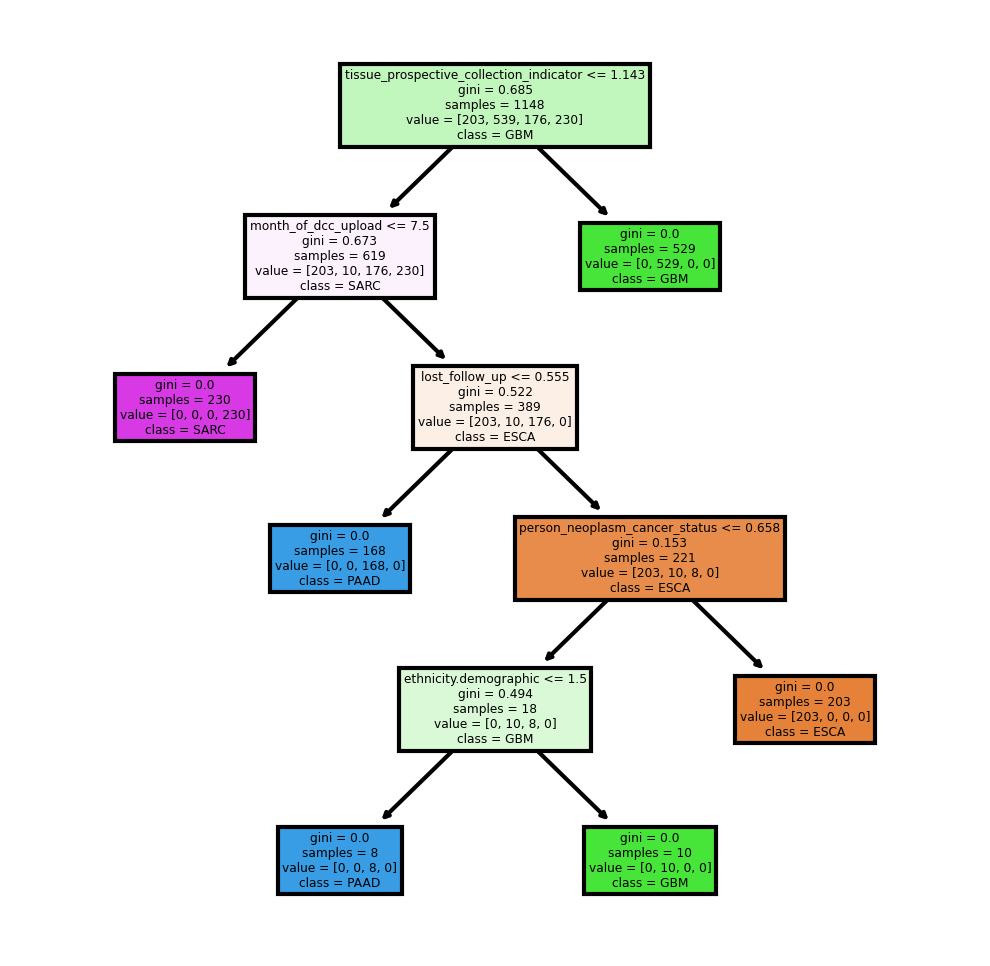

In [95]:
data = [ESCA, GBM, PAAD, SARC]
target_names= ["ESCA","GBM", "PAAD", "SARC"]


from sklearn.model_selection import train_test_split
a, b = pd.DataFrame(), np.ndarray((1,0))
for i in range(len(data)):
    ds = pd.DataFrame(np.asarray(data[i]))
    ds = ds.fillna(ds.mean())
    a = a.append(ds)
    b = np.append(b, np.ones(len(ds))*i)
    
a.columns=probes
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=42)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(str(int(100*clf.score(X_test, y_test))) +"% ")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf, feature_names=probes, class_names=target_names, filled=True)
tree.export_graphviz(clf, out_file="phenotree.dot", feature_names=probes, class_names=target_names, filled=True)

## Genotype

In [112]:
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-ESCA.htseq_counts.tsv"
samples = xena.dataset_samples(hub, dataset, None)
probes = xena.xenaAPI.dataset_fields (hub, dataset)
[ESCAposition, ESCAexpressions] = xena.dataset_probe_values(hub, dataset, samples, probes)

expression = np.asarray(ESCAexpressions)
ESCAg = pd.DataFrame(expression.T, columns=probes)

In [113]:
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-GBM.htseq_counts.tsv"
samples = xena.dataset_samples(hub, dataset, None)
probes = xena.xenaAPI.dataset_fields (hub, dataset)
[GBMposition, GBMexpressions] = xena.dataset_probe_values(hub, dataset, samples, probes)

expression = np.asarray(GBMexpressions)
GBMg = pd.DataFrame(expression.T, columns=probes)

In [114]:
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-PAAD.htseq_counts.tsv"
samples = xena.dataset_samples(hub, dataset, None)
probes = xena.xenaAPI.dataset_fields (hub, dataset)
[PAADposition, PAADexpressions] = xena.dataset_probe_values(hub, dataset, samples, probes)

expression = np.asarray(PAADexpressions)
PAADg = pd.DataFrame(expression.T, columns=probes)

In [115]:
hub = "https://gdc.xenahubs.net"
dataset = "TCGA-SARC.htseq_counts.tsv"
samples = xena.dataset_samples(hub, dataset, None)
probesg = xena.xenaAPI.dataset_fields (hub, dataset)
[SARCposition, SARCexpressions] = xena.dataset_probe_values(hub, dataset, samples, probesg)

expression = np.asarray(SARCexpressions)
SARCg = pd.DataFrame(expression.T, columns=probes)

In [116]:
mg = mygene.MyGeneInfo()
ENSG = [i.split('.')[0] if i[4]!='R' else i for i in probesg]
results = mg.querymany(ENSG, scopes='ensembl.gene', fields='symbol', species='human', verbose=False, as_dataframe=True)

symbols = []
for i in range(len(probes)):
    symbols.append(results['symbol'][i] if np.isnan(results['notfound'][i]) else probes[i])
symbols.pop()

C:\Users\lmcc9\Miniconda3\envs\py38\lib\site-packages\biothings_client\base.py:143: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


'sampleID'

In [117]:
datasets = []
datasets.append(ESCAg)
datasets.append(GBMg)
datasets.append(PAADg)
datasets.append(SARCg)
target_names= ["ESCA","GBM", "PAAD", "SARC"]

In [118]:
from sklearn.model_selection import train_test_split
a, b = pd.DataFrame(), np.ndarray((1,0))
for i in range(len(datasets)):
    ds = datasets[i]
    a = a.append(ds)
    b = np.append(b, np.ones(len(ds))*i)
a = a.drop("sampleID", 1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [120]:
symbols[symbols.index("ENSG00000278752.1")]="AL355301.1"
symbols[symbols.index("ENSG00000252133.1")]="AL590399.7"

98% 


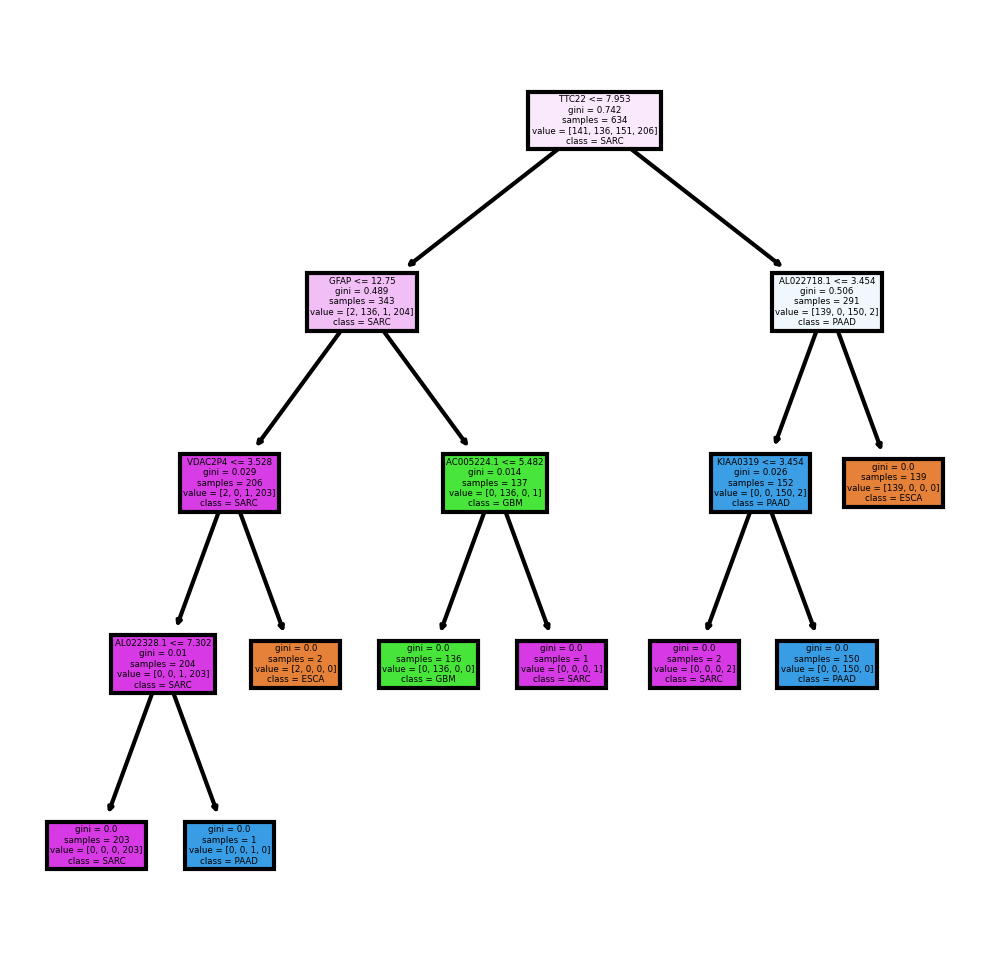

In [122]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(str(int(100*clf.score(X_test, y_test))) +"% ")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf, feature_names=symbols, class_names=target_names, filled=True)
tree.export_graphviz(clf, out_file="genotree.dot", feature_names=symbols, class_names=target_names, filled=True)

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
newA = lda.fit(a, b).transform(a)

In [128]:
print(len(a.T))
print(len(newA[0]))

60488
3


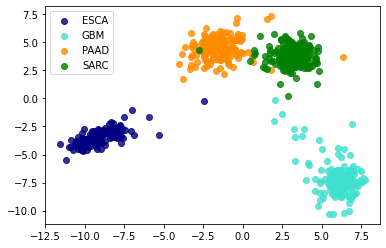

In [129]:
colors = ['navy', 'turquoise', 'darkorange', 'green']

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(newA[b == i, 0], newA[b == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.savefig('2dLDA.png')

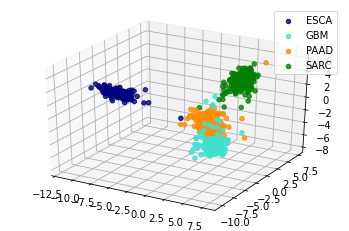

In [130]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    Axes3D.scatter(ax, newA[b == i, 0], newA[b == i, 1], newA[b == i, 2], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.savefig('3dLDA.png')

In [16]:
import operator 

def topN(a, n):
    d = {k:v for k, v in enumerate(a)}
    sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
    result_list = [k[0] for k in sorted_d][:n]
    return result_list

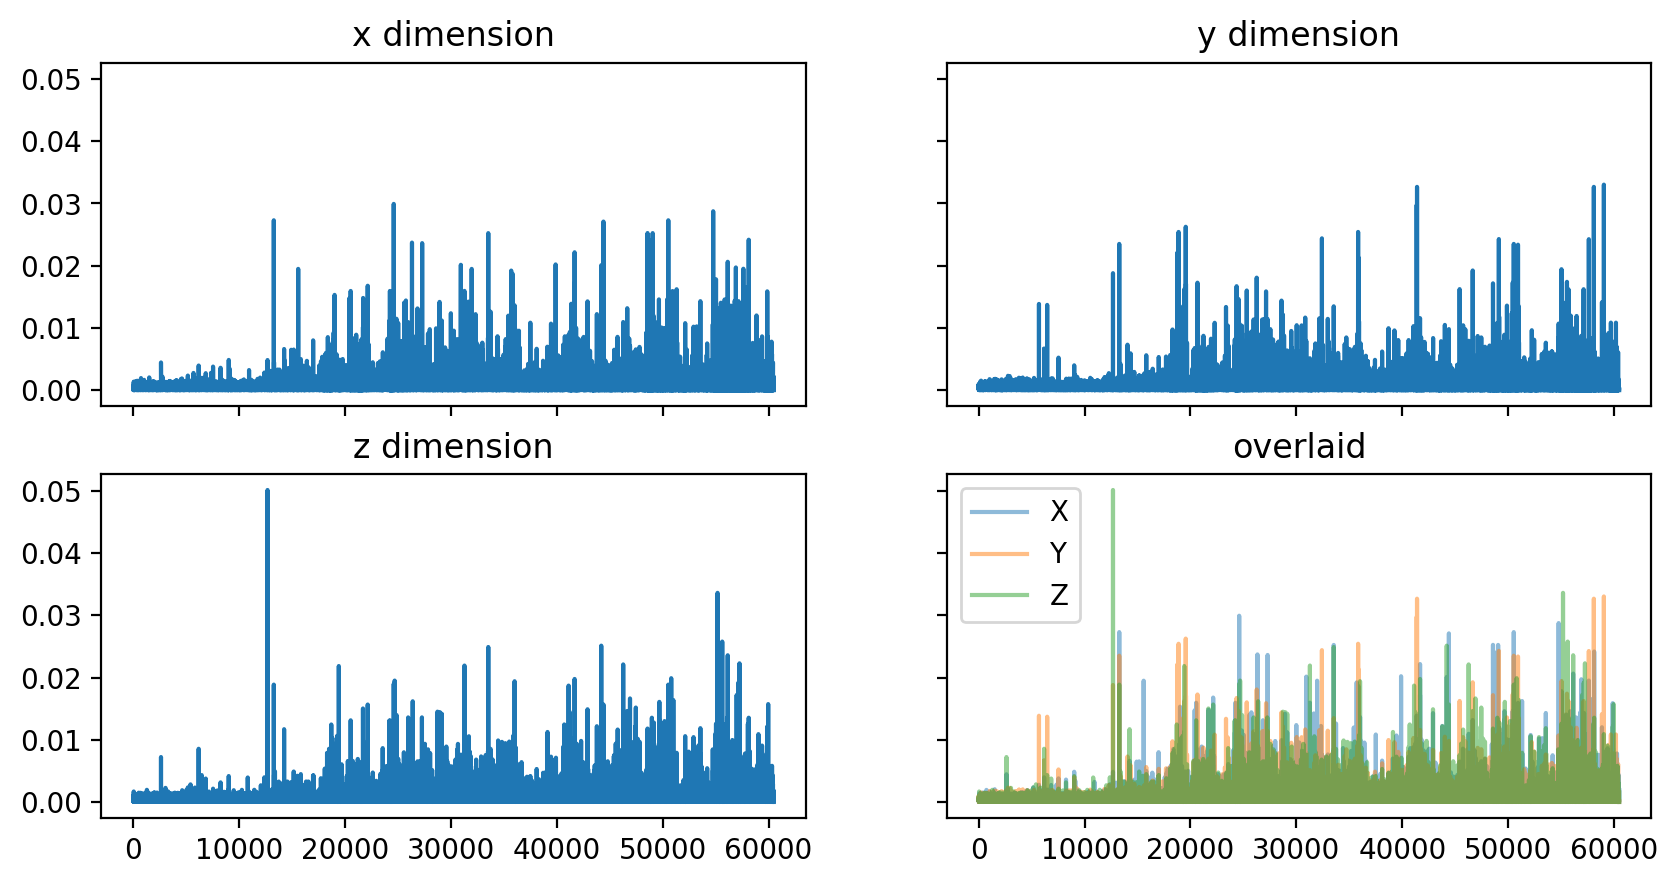

In [78]:
scalings = lda.scalings_
LD1 = [np.abs(item[0]) for item in scalings]
LD2 = [np.abs(item[1]) for item in scalings]
LD3 = [np.abs(item[2]) for item in scalings]

fig, ax = plt.subplots(2, 2,figsize = (10,5), dpi=200, sharex=True, sharey=True)
ax[0, 0].plot(LD1)
ax[0, 0].set(title="x dimension")
ax[0, 1].plot(LD2)
ax[0, 1].set(title="y dimension")
ax[1, 0].plot(LD3)
ax[1, 0].set(title="z dimension")
ax[1, 1].plot(LD1, alpha=0.5)
ax[1, 1].plot(LD2, alpha=0.5)
ax[1, 1].plot(LD3, alpha=0.5)
ax[1, 1].legend(["X","Y","Z"])
ax[1, 1].set(title="overlaid")
fig.savefig('scalings.png')

protsLD1 = [symbols[item] for item in topN(LD1, 5)]
protsLD2 = [symbols[item] for item in topN(LD2, 5)]
protsLD3 = [symbols[item] for item in topN(LD3, 5)]

In [79]:
print(protsLD1)
print(protsLD2)
print(protsLD3)

['MIR1233-1', 'SNORA78', 'CDY1', 'AC016888.1', 'AC055720.1']
['AC145098.2', 'AL590399.7', 'AL355301.1', 'RNU4ATAC7P', 'AL357274.1']
['RBMY1HP', 'TBC1D3H', 'PANO1', 'AC090099.1', 'ID2-AS1']


In [145]:
from sklearn.decomposition import PCA

pca = PCA()
newA = pca.fit_transform(a)

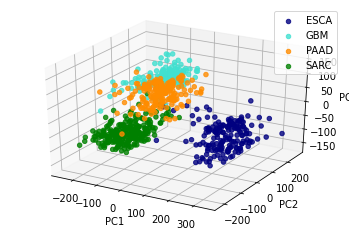

In [177]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    Axes3D.scatter(ax, newA[b == i, 0], newA[b == i, 1], newA[b == i, 2], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel("PC3")
plt.savefig('3dpca.png')

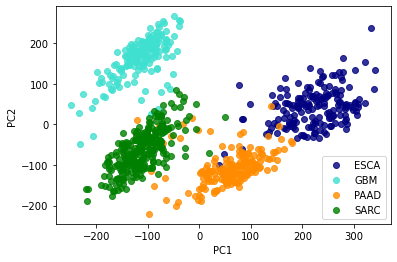

In [178]:
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(newA[b == i, 0], newA[b == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('2dpca.png')

In [168]:
sum(pca.explained_variance_ratio_[0:400])

0.9066338967704375

In [179]:
pca.explained_variance_ratio_

array([2.10096125e-01, 1.26387913e-01, 7.07521358e-02, 4.35264103e-02,
       2.85740298e-02, 2.29387687e-02, 1.78429677e-02, 1.67947547e-02,
       1.27517284e-02, 1.07394734e-02, 9.73213963e-03, 8.21135538e-03,
       7.74485708e-03, 6.82255942e-03, 6.23340252e-03, 5.14035303e-03,
       4.72232199e-03, 4.39029822e-03, 4.21299459e-03, 4.10001533e-03,
       4.01345922e-03, 3.61749829e-03, 3.43031441e-03, 3.32449198e-03,
       3.21828396e-03, 3.07045887e-03, 2.96081660e-03, 2.87406415e-03,
       2.75258492e-03, 2.65081479e-03, 2.58088276e-03, 2.50160740e-03,
       2.40641384e-03, 2.35331954e-03, 2.23748845e-03, 2.21263290e-03,
       2.08763915e-03, 2.06204035e-03, 2.03882933e-03, 1.95794764e-03,
       1.91147264e-03, 1.90220046e-03, 1.76413243e-03, 1.75266537e-03,
       1.73461080e-03, 1.70985071e-03, 1.68493317e-03, 1.63399551e-03,
       1.62255884e-03, 1.60289015e-03, 1.58645197e-03, 1.57236171e-03,
       1.53671629e-03, 1.48686002e-03, 1.47479891e-03, 1.42893810e-03,
      

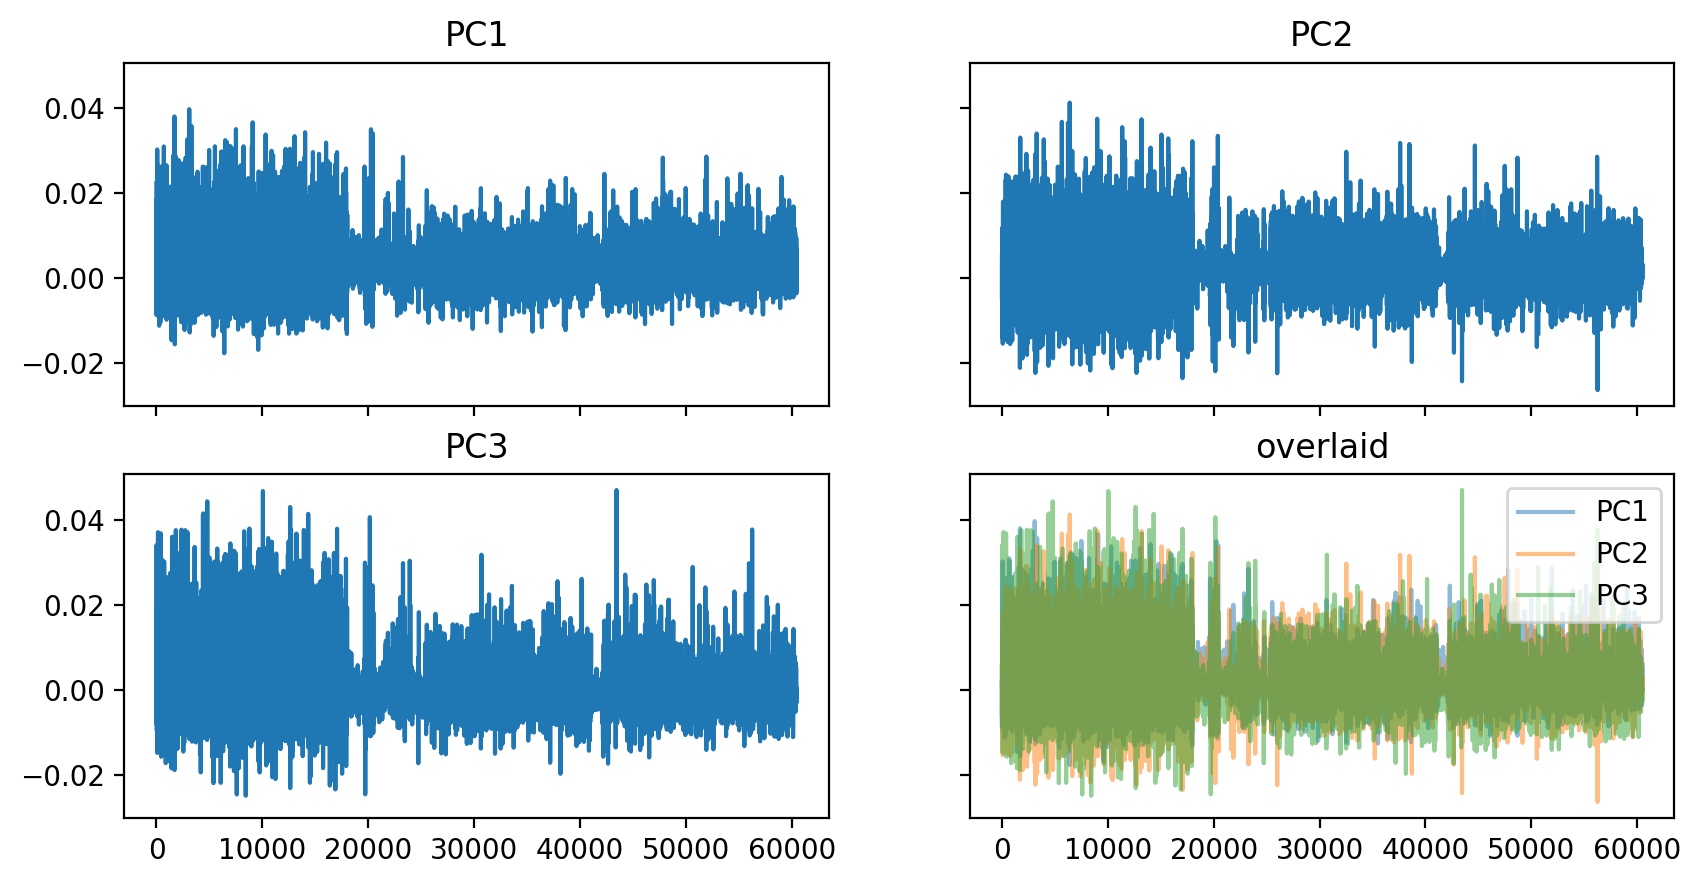

In [170]:
scalings = pca.components_
PC1 = scalings[0]
PC2 = scalings[1]
PC3 = scalings[2]

fig, ax = plt.subplots(2, 2,figsize = (10,5), dpi=200, sharex=True, sharey=True)
ax[0, 0].plot(PC1)
ax[0, 0].set(title="PC1")
ax[0, 1].plot(PC2)
ax[0, 1].set(title="PC2")
ax[1, 0].plot(PC3)
ax[1, 0].set(title="PC3")
ax[1, 1].plot(PC1, alpha=0.5)
ax[1, 1].plot(PC2, alpha=0.5)
ax[1, 1].plot(PC3, alpha=0.5)
ax[1, 1].legend(["PC1","PC2","PC3"])
ax[1, 1].set(title="overlaid")
fig.savefig('principalcomponents.png')

protsPC1 = [symbols[item] for item in topN(PC1, 5)]
protsPC2 = [symbols[item] for item in topN(PC2, 5)]
protsPC3 = [symbols[item] for item in topN(PC3, 5)]
plt.savefig("PCS.png")

In [180]:
print(protsPC1)
print(protsPC2)
print(protsPC3)

['CEACAM5', 'CEACAM6', 'LCN2', 'AGR2', 'TMPRSS4']
['GFAP', 'PMP2', 'AQP4', 'MIR9-1HG', 'NCAN']
['AC087379.1', 'SST', 'TTR', 'GJB1', 'REG1A']
